## ほくでん 過去の電力使用状況データ

「過去の電力使用状況データのダウンロード」ページから取得したzipファイルを展開し、CSVファイルからデータを取り出して連結します。

http://denkiyoho.hepco.co.jp/area_download.html

### zipファイルを展開する

In [83]:
import zipfile
import os

# カレントディレクトリの下にディレクトリを用意する
zip_directory = '_zip'
csv_directory = '_csv'

path = os.path.join(os.getcwd(), zip_directory)

zip_file = os.path.join(path, "201807-09_hokkaido_denkiyohou.zip")

with zipfile.ZipFile(zip_file) as myzip:
    myzip.extractall(csv_directory)

### CSVファイルをリストにする

In [84]:
path = os.path.join(os.getcwd(), csv_directory)

csv_files = [os.path.join(path, filename) for filename in os.listdir(path)]

print(len(csv_files))

69


### CSVファイルを読み込んでDataFrameを連結する

In [94]:
import pandas as pd

data = [pd.read_csv(file, encoding='shift_jis', skiprows=7, nrows=24, usecols=[0,1,2,3,4]) for file in csv_files]

df = pd.concat(data)

df.head()

,DATE,TIME,当日実績(万kW),予測値(万kW),使用率(%)
0,2018/7/1,0:00,271.0,279,67.0
1,2018/7/1,1:00,273.0,279,67.0
2,2018/7/1,2:00,279.0,294,69.0
3,2018/7/1,3:00,288.0,299,71.0
4,2018/7/1,4:00,281.0,295,70.0


In [95]:
df.tail()

,DATE,TIME,当日実績(万kW),予測値(万kW),使用率(%)
19,2018/9/7,19:00,0.0,0,0.0
20,2018/9/7,20:00,0.0,0,0.0
21,2018/9/7,21:00,0.0,0,0.0
22,2018/9/7,22:00,0.0,0,0.0
23,2018/9/7,23:00,0.0,0,0.0


### DataFrameをCSVファイルに書き出す

In [98]:
path = os.path.join(os.getcwd(), 'data')

csv_file = os.path.join(path, '201807-09_hokkaido_denki.csv')

df.to_csv(csv_file, encoding='shift_jis', index=False)

### indexをdatetimeに変換する

In [101]:
df['日時'] = pd.to_datetime(df['DATE'] +' ' +df['TIME'])
df.set_index('日時', inplace=True)

### 使用電力実績のプロット

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

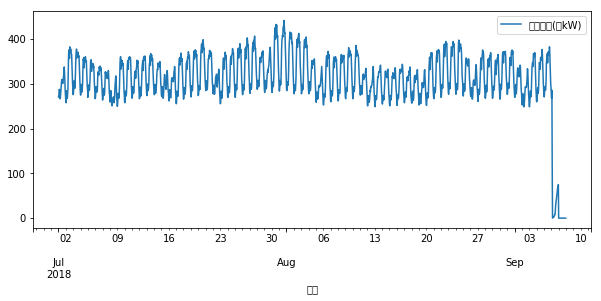

In [117]:
df.fillna(0).plot(y=['当日実績(万kW)'], figsize=(10,4))

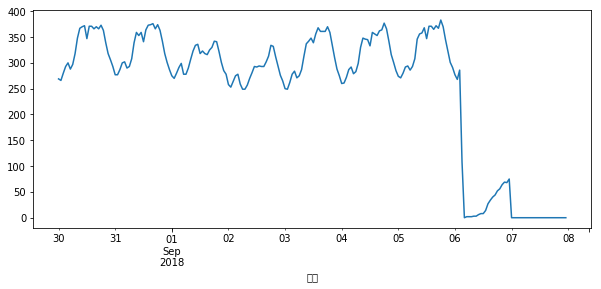

In [126]:
from datetime import datetime, timedelta

# 8月30日以降のデータをプロット
day = datetime(2018, 8, 30)

df.loc[day:, '当日実績(万kW)'].fillna(0).plot(figsize=(10,4))